# Start

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.pipeline import Pipeline

import docx
import PyPDF2
from PIL import Image
import pytesseract

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Migo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Migo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./emails.csv
./Spam messages filtering.ipynb
./spam.csv
./test.docx
./untitled.txt
./.ipynb_checkpoints\Spam messages filtering-checkpoint.ipynb


In [3]:
data=pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:


data.columns



Index(['Category', 'Message'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [7]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
# Combine all messages and create a label array (1 for spam, 0 for ham)
all_messages = data['Message']
labels = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform all messages
all_matrix = vectorizer.fit_transform(all_messages)

# Convert to DataFrame
all_word_freq = pd.DataFrame(all_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add labels to the DataFrame
all_word_freq['Label'] = labels

# Calculate the frequency of each word in spam and ham messages
spam_word_freq = all_word_freq[all_word_freq['Label'] == 1].drop('Label', axis=1).sum()
ham_word_freq = all_word_freq[all_word_freq['Label'] == 0].drop('Label', axis=1).sum()

# Sort and display the most frequent words in spam and ham messages
spam_word_freq_sorted = spam_word_freq.sort_values(ascending=False)
ham_word_freq_sorted = ham_word_freq.sort_values(ascending=False)

spam_word_freq_sorted.head(10), ham_word_freq_sorted.head(10)


(to      688
 call    352
 you     297
 your    264
 free    224
 for     204
 the     203
 now     199
 or      188
 txt     163
 dtype: int64,
 you     1948
 to      1562
 the     1133
 and      858
 in       823
 me       777
 my       754
 is       739
 it       718
 that     560
 dtype: int64)

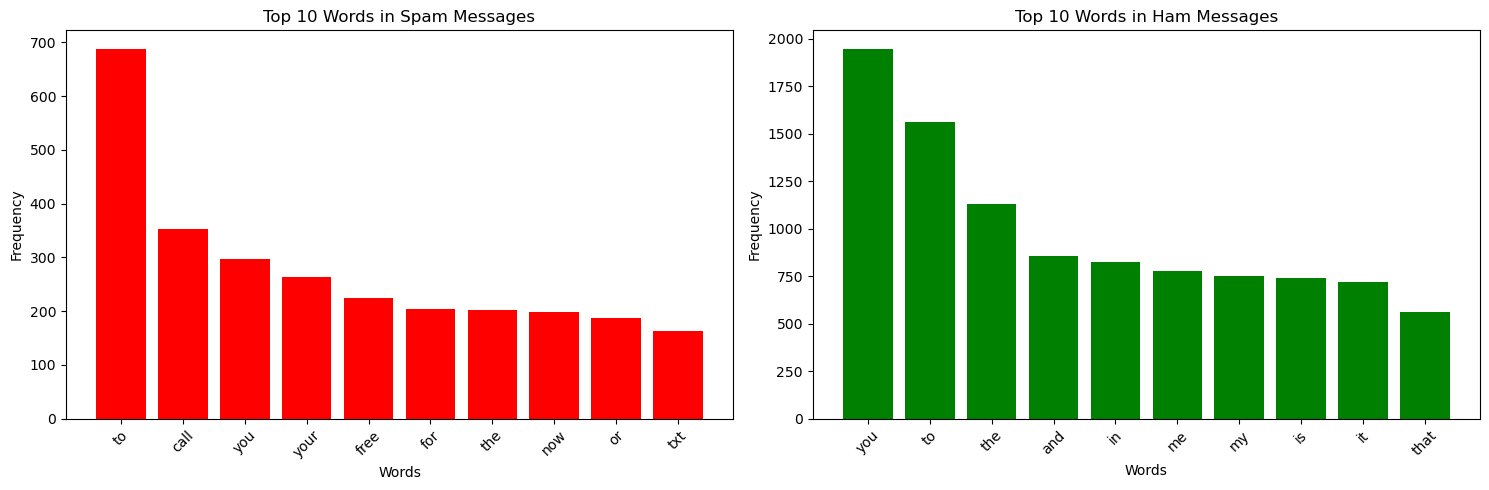

In [9]:


# Select the top 10 most frequent words in both spam and ham categories
top_spam_words = spam_word_freq_sorted.head(10)
top_ham_words = ham_word_freq_sorted.head(10)

# Create subplots for spam and ham word frequencies
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot for spam words
axes[0].bar(top_spam_words.index, top_spam_words.values, color='red')
axes[0].set_title('Top 10 Words in Spam Messages')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot for ham words
axes[1].bar(top_ham_words.index, top_ham_words.values, color='green')
axes[1].set_title('Top 10 Words in Ham Messages')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()
plt.show()


In [10]:

X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.20)

In [11]:

clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])



In [12]:


clf.fit(X_train,y_train)



Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [13]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [14]:
clf.predict(emails)

array([0, 1], dtype=int64)

In [15]:
clf.score(X_test,y_test)

0.9811659192825112

In [16]:
#---------------------------------------------------------------------------------

# Spam filtering Docx, PDF, Excell, Images

## Filtering Docx

## Please use a safe environment to code in like a virtual machine, who knows, the virus may be real

In [17]:
# In this case we will be reading from a virus free document.


In [25]:
import docx

def read_docx(file_path):
    doc = docx.Document(file_path)
    text = []
    for paragraph in doc.paragraphs:
        text.append(paragraph.text)
    return '\n'.join(text)

# Example usage:
docx_text = read_docx('test.docx')
print(docx_text)


Peer Review by Miguel Ibrahim
For Group 12
Ghent University
Professor Joris Walraevens
E031710A - Research Project
Titled: Automatic and FAIR Annotation of Artworks
The paper presented by group 12 is a comprehensive overview of the challenges and strategies related to object detection in artworks. It also focuses on the use of deep learning techniques and iconography. The research is well-structured and informative, providing valuable insights into the field of computer vision applied to art analysis. 
In fact, the research paper has a wide range of strengths and weaknesses
The strengths of the research paper can be categorized into the following:
The paper is well-organized, well structured, with clear bold points reflecting what each paragraph will deal with, making it easy to follow the flow of ideas as well as their relevancy with the topic.
This paper also provides a suggestion to future researchers, such as the need for larger and more diverse datasets, which is a common lack in 

In [40]:
all_matrix_docx = vectorizer.fit_transform([docx_text])
vectorized_docx_text = vectorizer.transform([all_matrix_docx])

vectorized_docx_text


AttributeError: 'csr_matrix' object has no attribute 'lower'

In [38]:
prediction = clf.predict(all_matrix_docx)

AttributeError: 'csr_matrix' object has no attribute 'lower'

## Filtering PDF

In [ ]:


def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfFileReader(file)
        return [reader.getPage(i).extractText() for i in range(reader.numPages)]

text = read_pdf('yourfile.pdf')


## Filtering Excell

## Filtering Images

In [ ]:


def extract_text_from_image(image_path):
    image = Image.open(image_path)
    return pytesseract.image_to_string(image)

text = extract_text_from_image('yourimage.png')
